In [116]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

In [117]:
X = pd.read_csv('./data/1_x.csv', header=None)
Y = pd.read_csv('./data/1_y.csv', header=None)

In [118]:
X = X.set_axis(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], axis=1, copy=False)
Y = Y.set_axis(['y'], axis=1, copy=False)
pass

In [119]:
X

,x1,x2,x3,x4,x5,x6,x7
0,1.599865,0.340598,-0.603400,0.150586,-0.209677,0.955045,0.347682
1,1.472656,0.466832,-1.947130,0.625906,0.589354,0.753521,-2.138552
2,0.279378,-1.717121,0.251069,0.730013,0.301801,-0.206711,0.894811
3,0.450771,1.133196,-0.294028,-2.595338,0.313911,1.953527,0.359938
4,1.507042,0.932115,-0.789549,1.043712,-1.404000,-0.124354,-0.921117
...,...,...,...,...,...,...,...
120,1.018825,1.618920,-1.561572,1.057171,1.893181,-0.647510,1.220188
121,-1.244391,0.327816,-1.004231,-1.877654,1.307478,-1.839689,-0.176182
122,-1.968106,-0.054336,0.558046,-0.527741,-0.060449,0.531740,-0.374088
123,-0.970556,0.436830,0.877973,-0.970337,-0.282711,-1.464295,-0.976662


In [120]:
Y

,y
0,101.507602
1,-65.305680
2,152.189336
3,-109.702103
4,-11.188624
...,...
120,293.947002
121,-146.511266
122,-143.163481
123,-188.233401


In [121]:
print(f"количество точек данных: {X.shape[0]}", f"количество признаков: {X.shape[1]}", sep="\n")
display(X.describe())

количество точек данных: 125
количество признаков: 7


,x1,x2,x3,x4,x5,x6,x7
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,-0.046701,0.173034,0.049015,-0.005271,-0.095981,-0.107452,-0.056552
std,0.933281,0.928898,0.984631,1.000964,1.087336,0.928998,1.064615
min,-2.190258,-2.358885,-2.081062,-2.898741,-2.841371,-2.907825,-2.138552
25%,-0.775334,-0.429173,-0.657021,-0.685499,-0.869306,-0.672357,-0.936561
50%,0.030645,0.204892,-0.048617,0.054299,-0.102158,-0.174373,0.062705
75%,0.545665,0.755290,0.804735,0.659364,0.689661,0.531740,0.596198
max,2.092059,3.142216,2.272042,2.065050,2.660842,2.086050,3.026906


In [122]:
Xtr, Xt, Ytr, Yt = train_test_split(X, Y, test_size=0.2, random_state=0)

In [123]:
reg = linear_model.LinearRegression()

regP = {
    key: {
        "reg": linear_model.LinearRegression(),
        "Xtr": Xtr[key].to_numpy().reshape(-1, 1),
        "Xt": Xt[key].to_numpy().reshape(-1, 1)
    } for key in X.columns}

In [124]:
reg.fit(Xtr, Ytr)
for key, components in regP.items():
    components["reg"].fit(components["Xtr"], Ytr)

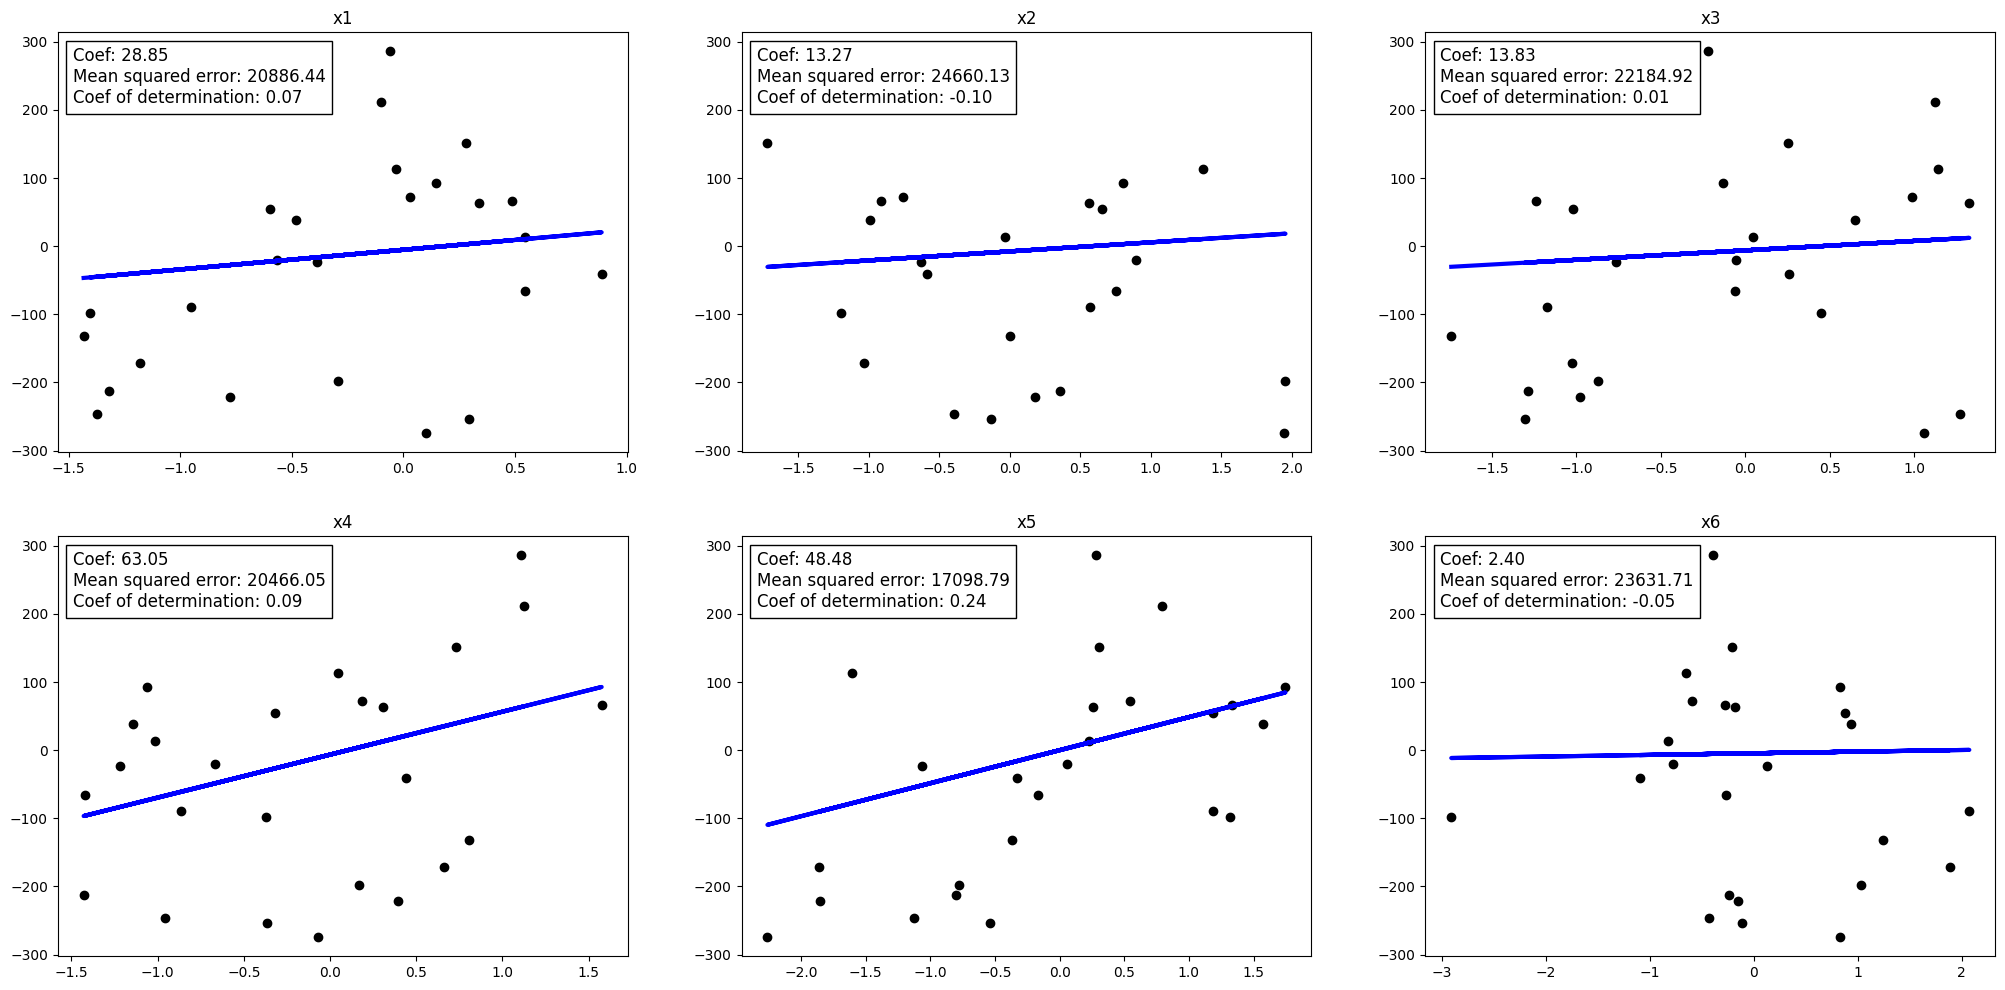

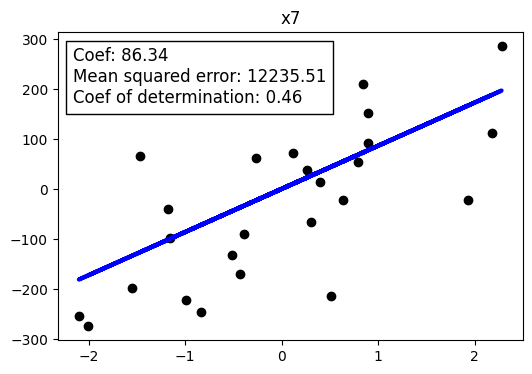

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,12))
for (key, components), ax in zip(regP.items(), fig.axes):
    predict = components["reg"].predict(components["Xt"])
    ax.scatter(components["Xt"], Yt, color="black")
    ax.plot(components["Xt"], predict, color="blue", linewidth=3)
    ax.set_title(key)
    text = f'Coef: {components["reg"].coef_[0][0]:.2f}\n'+\
           f'Mean squared error: {metrics.mean_squared_error(Yt, predict):.2f}\n'+\
           f'Coef of determination: {metrics.r2_score(Yt, predict):.2f}'
    at = AnchoredText(text, prop=dict(size=12), loc='upper left')
    ax.add_artist(at)
plt.show()
key = "x7"
fig, ax = plt.subplots(figsize=(6,4))
predict = regP["x7"]["reg"].predict(regP["x7"]["Xt"])
plt.scatter(regP["x7"]["Xt"], Yt, color="black")
plt.plot(regP["x7"]["Xt"], predict, color="blue", linewidth=3)
ax.set_title(key)
text = f'Coef: {regP["x7"]["reg"].coef_[0][0]:.2f}\n'+\
           f'Mean squared error: {metrics.mean_squared_error(Yt, predict):.2f}\n'+\
           f'Coef of determination: {metrics.r2_score(Yt, predict):.2f}'
at = AnchoredText(text, prop=dict(size=12), loc='upper left')
ax.add_artist(at)
plt.show()

In [126]:
Yp = reg.predict(Xt)

In [127]:
df = pd.DataFrame({'Actual': np.reshape(Yt.to_numpy(), (1, -1))[0], 'Predicted': Yp.reshape(1, -1)[0]})
df

,Actual,Predicted
0,-131.233477,-119.476516
1,-22.452138,-24.526072
2,-212.860797,-199.505119
3,63.268545,64.037969
4,-170.781614,-177.859241
5,-254.290884,-242.259353
6,285.973829,271.183728
7,211.158999,214.640832
8,-198.420692,-192.406358
9,-274.437935,-263.466644


In [128]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Yt, Yp))
print('Mean Squared Error:', metrics.mean_squared_error(Yt, Yp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Yt, Yp)))

Mean Absolute Error: 7.735760033626649
Mean Squared Error: 78.59882531222907
Root Mean Squared Error: 8.865597854190606


In [129]:
metrics.confusion_matrix(Yt, Yp)

ValueError: continuous is not supported